In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
train_data=pd.read_csv('/content/train.csv')

<AxesSubplot:xlabel='Age', ylabel='Density'>

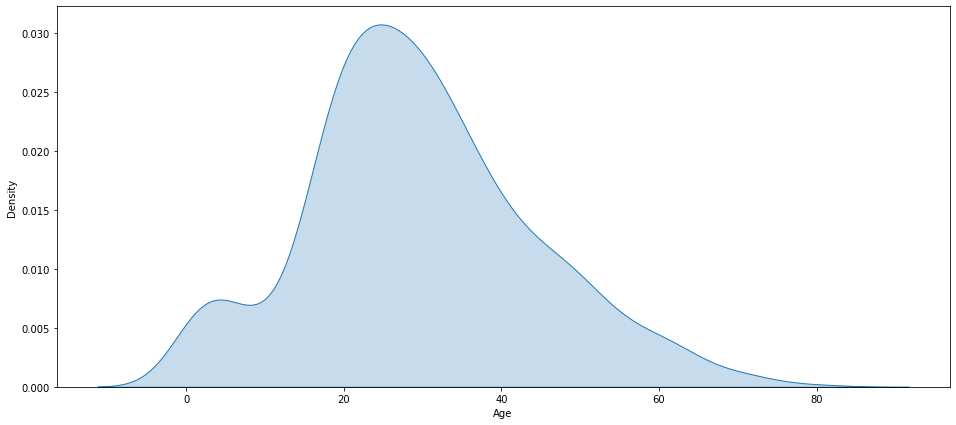

In [21]:
plt.figure(figsize=(16,7))
sns.kdeplot(data = train_data['Age'], shade = True)

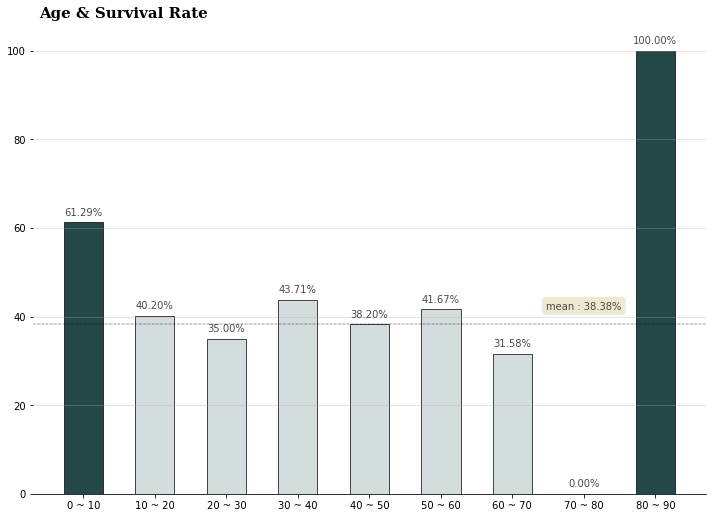

In [17]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'
train_data['age_band'] = train_data['Age'].apply(age_band)
titanic_age = train_data[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' 
ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)
for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')
mean = train_data['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))
fig.text(0.06, 1, 'Age & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.tight_layout()
plt.show()

In [18]:
survival_rate = train_data.groupby(['Sex']).mean()[['Survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']
display(survival_rate)

,Survived
Sex,
female,0.742038
male,0.188908


Text(0.5, 1.0, 'Survived')

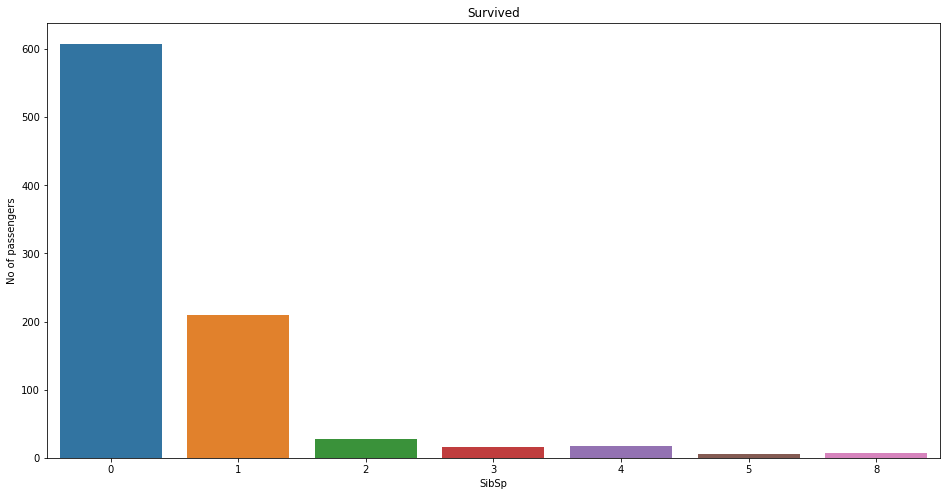

In [19]:
plt.figure(figsize = (16,8))
sns.countplot(x = train_data["SibSp"])
plt.ylabel("No of passengers")
plt.title("Survived")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

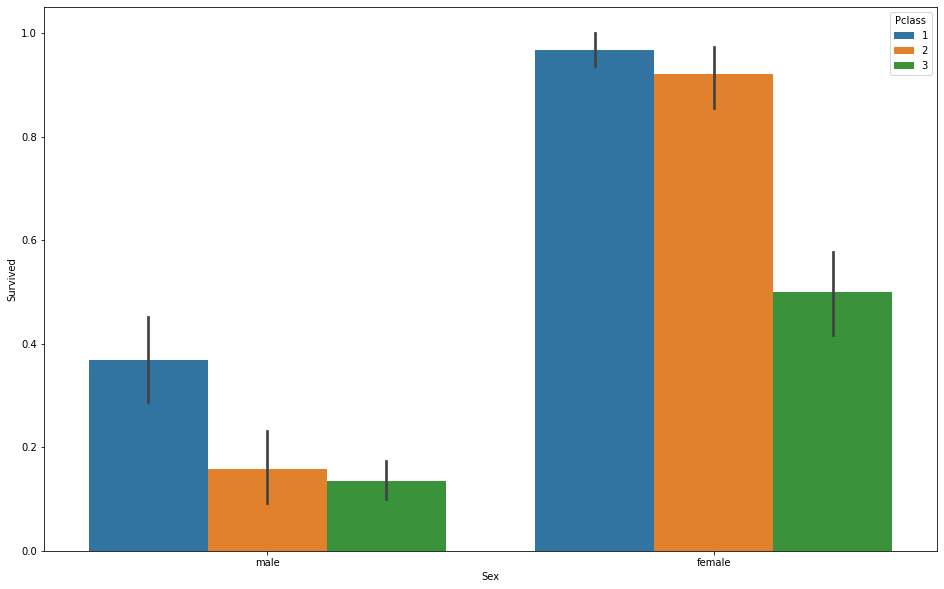

In [20]:
plt.figure(figsize=(16,10))
sns.barplot(x=train_data["Sex"], y= train_data["Survived"], hue = train_data["Pclass"])